In [1]:
import pandas as pd
from pathlib import Path

import math

import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/afs/desy.de/user/a/axelheim/private/run_BaumBauenNotebooks')



from tb_to_csv import tabulate_metrics
from plot_fcts import curve_plot, multi_metric_bar_plot

In [2]:
data_names = ["TSD_BsX_15k_each_6trees_charge_allKwPionMass",   
"TSD_BsX_15k_each_6trees_IDs_charge_allKwPionMass",   
"TSD_BsX_15k_each_6trees_only4mom_allKwPionMass", 
"TSD_BsX_15k_each_6trees_charge_noEnergy",  
"TSD_BsX_15k_each_6trees_IDs_charge_noEnergy",       
"TSD_BsX_15k_each_6trees_only4mom_noEnergy", 
"TSD_BsX_15k_each_6trees_IDs_allKwPionMass",     
"TSD_BsX_15k_each_6trees_IDs_noEnergy"] 

specs = ["1024_0.001_128_0.3_8"]

Converting run events.out.tfevents.1624442737.batchg005.desy.de.195008.0

- Done
61
0
1
Converting run events.out.tfevents.1624442735.batchg009.desy.de.59505.0

- Done
61
0
1
Converting run events.out.tfevents.1624442748.batchg007.desy.de.88538.0

- Done
60
0
1
Converting run events.out.tfevents.1624442739.batchg008.desy.de.131551.0

- Done
60
0
1
Converting run events.out.tfevents.1624442734.batchg011.desy.de.2776.0

- Done
86
0
1
Converting run events.out.tfevents.1624442740.batchg013.desy.de.154123.0

- Done
86
0
1
Converting run events.out.tfevents.1624442743.batchg012.desy.de.121815.0

- Done
86
0
1


/afs/desy.de/user/a/axelheim/private/run_BaumBauenNotebooks/plot_fcts.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  name=plt.figure()#figsize=(3.487,3.487/1.618))


Converting run events.out.tfevents.1624446218.batchg010.desy.de.60810.0

- Done
89
0
1


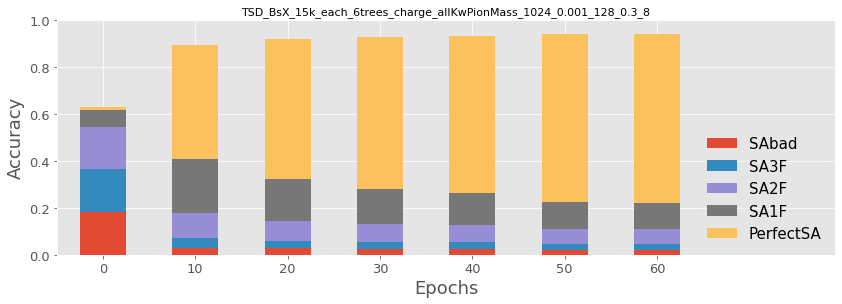

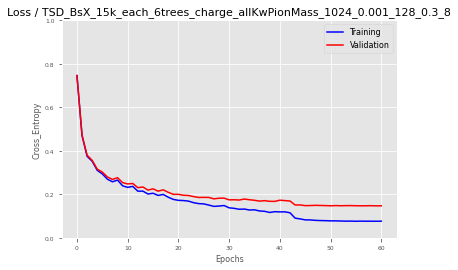

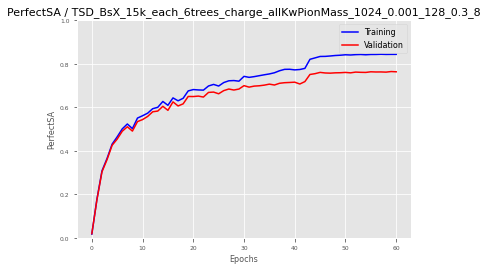

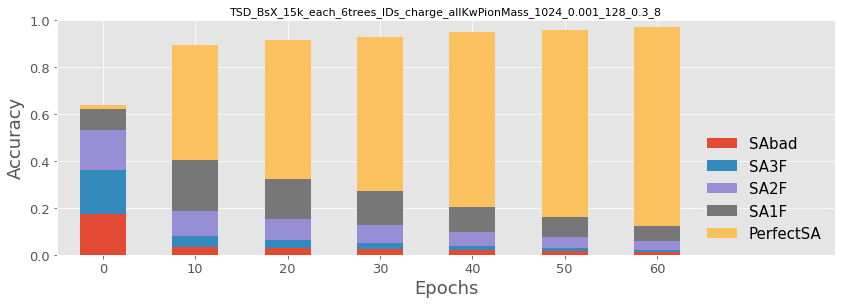

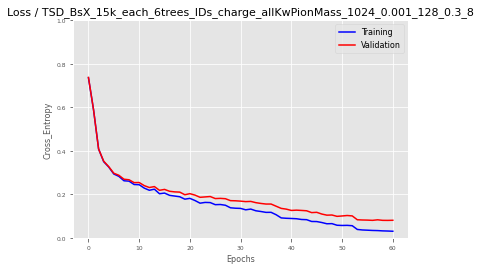

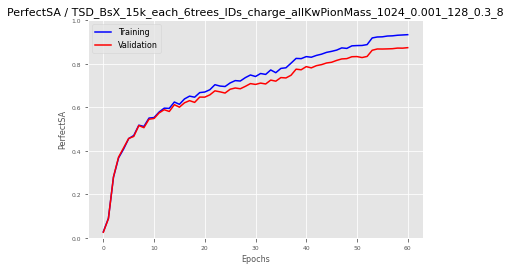

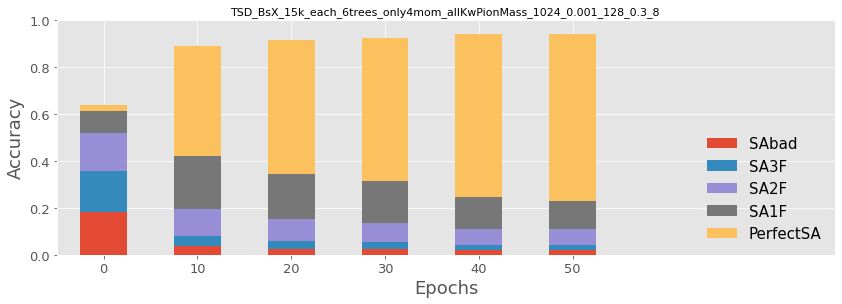

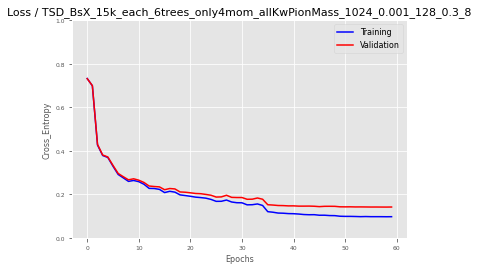

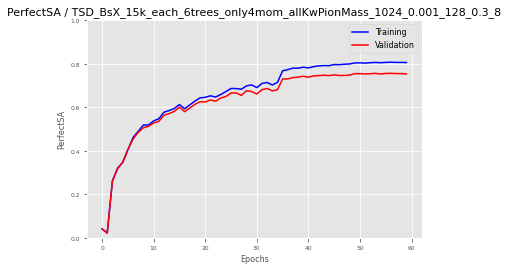

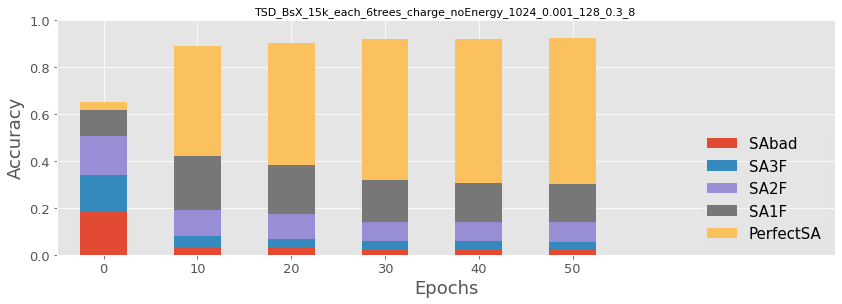

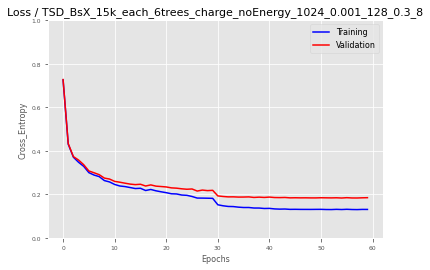

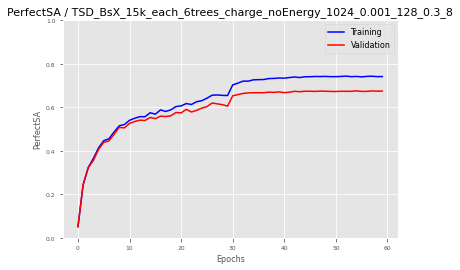

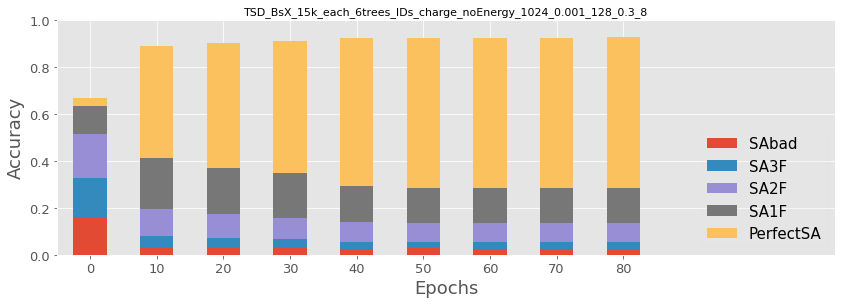

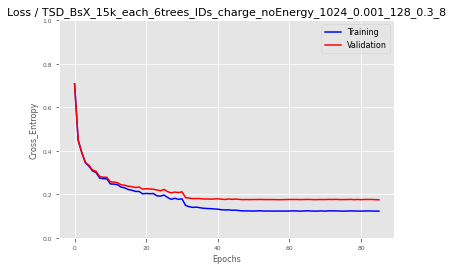

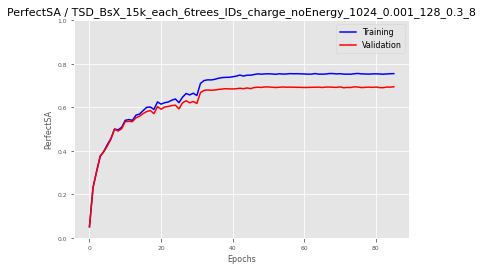

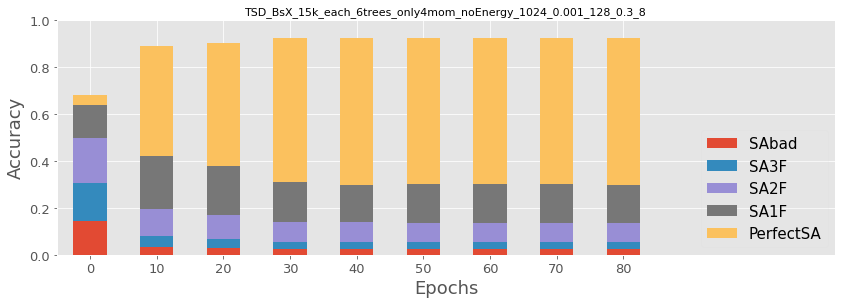

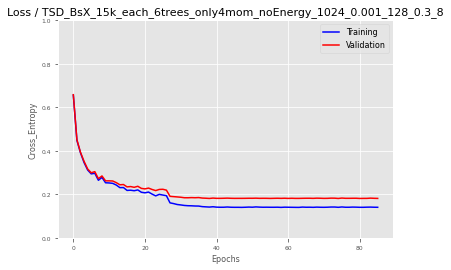

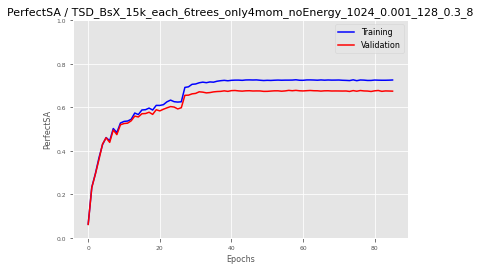

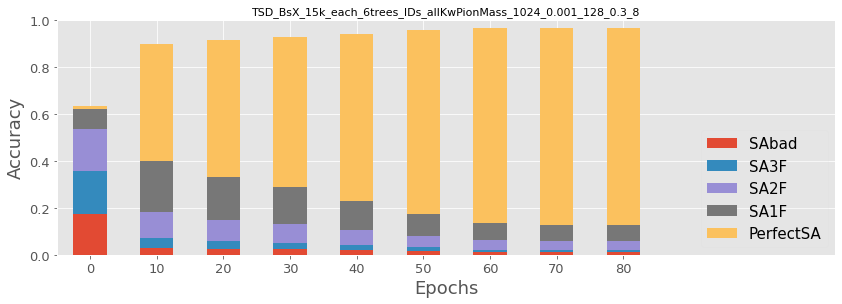

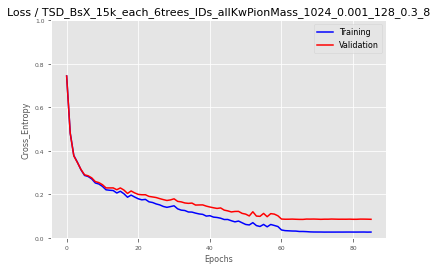

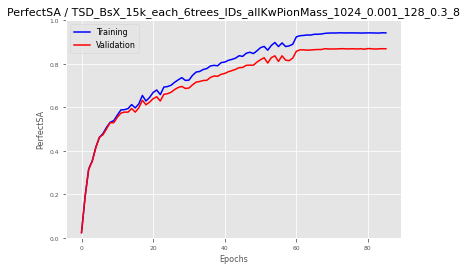

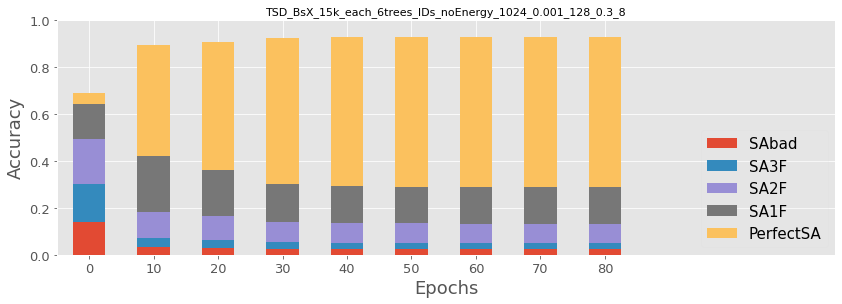

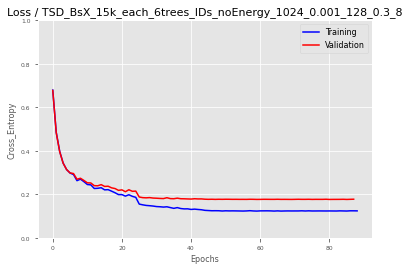

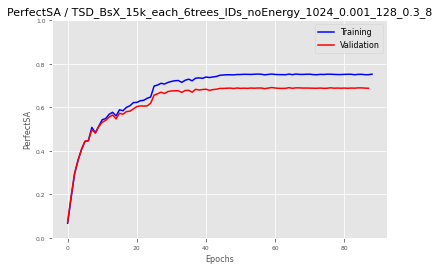

In [3]:
for data_name in data_names:
    for spec in specs:
        plotname_extension = data_name + '_' + spec
        
        nfs_path = "/nfs/dust/belle2/user/axelheim/BranchSeparator/BsX_hadrIDtrials/"

        plot_path = "/afs/desy.de/user/a/axelheim/private/BsX_hadrIDtrials/"
        
        
        data_dir = Path((nfs_path + 'tb_logs/' + data_name + '/' + spec))
        
        csv_dir = Path((nfs_path + 'tb_csv/' + data_name + '/' + spec))
        csv_dir.mkdir(parents=True, exist_ok=True)

        plot_path = Path((plot_path + 'plots/' + data_name + '/' + spec))
        plot_path.mkdir(parents=True, exist_ok=True)

        tb_metrics = tabulate_metrics(data_dir, csv_dir)

        
        # choosing the tb_log with the most epochs recorded
        epochs = []
        for i in range(len(tb_metrics)):
            epochs.append(len(tb_metrics[i]))
            print(epochs[i])
            
        most_epochs_idx = 0
        if len(tb_metrics) > 1:
            most_epochs_idx = epochs.index(max(epochs))
        
        print(most_epochs_idx)
        print(len(tb_metrics))
        longest_run = tb_metrics[most_epochs_idx]
        
        
        # the actual plots
        # bar plot
        steps = math.ceil(len(longest_run)/10)
        steps = int(math.ceil(steps / 5.0)) * 5
        multi_metric_bar_plot(longest_run, plot_path, ('barplot_metrics_' + plotname_extension), data_type="Validation", step=steps, metric_type="SA", title=plotname_extension)
        
        
        # loss plot
        loss_tr = longest_run['Cross Entropy/Training']
        loss_val = longest_run['Cross Entropy/Validation']
        curve_plot(loss_tr, loss_val, plot_path, ('loss_comparison_' + plotname_extension), 'Cross_Entropy', ('Loss / ' + plotname_extension))

        # perfect SA plot
        pLCA_tr = longest_run['PerfectSA/Training']
        pLCA_val = longest_run['PerfectSA/Validation']
        curve_plot(pLCA_tr, pLCA_val, plot_path, ('perfectSA_comparison_' + plotname_extension), 'PerfectSA', ('PerfectSA / ' + plotname_extension))

In [6]:
for data_name in data_names:
    for spec in specs:
        plotname_extension = data_name + '_' + spec
        
        nfs_path = "/nfs/dust/belle2/user/axelheim/BranchSeparator/BsX_hadrIDtrials/"

        plot_path = "/afs/desy.de/user/a/axelheim/private/BsX_hadrIDtrials/"
        
        
        data_dir = Path((nfs_path + 'tb_logs/' + data_name + '/' + spec))
        
        csv_dir = Path((nfs_path + 'tb_csv/' + data_name + '/' + spec))
        csv_dir.mkdir(parents=True, exist_ok=True)

        plot_path = Path((plot_path + 'plots/' + data_name + '/' + spec))
        plot_path.mkdir(parents=True, exist_ok=True)

        tb_metrics = tabulate_metrics(data_dir, csv_dir)

        
        # choosing the tb_log with the most epochs recorded
        epochs = []
        for i in range(len(tb_metrics)):
            epochs.append(len(tb_metrics[i]))
            print(epochs[i])
            
        most_epochs_idx = 0
        if len(tb_metrics) > 1:
            most_epochs_idx = epochs.index(max(epochs))
        
        print(most_epochs_idx)
        print(len(tb_metrics))
        longest_run = tb_metrics[most_epochs_idx]
        
        
        print("\n",plotname_extension)
        print("perfect SA:",round(max(longest_run["PerfectSA/Validation"])*100,2),"%")                
        print("Accuracy:",round(max(longest_run["Accuracy/Validation"])*100,2),"% \n")        

Converting run events.out.tfevents.1624442737.batchg005.desy.de.195008.0

- Done
61
0
1

 TSD_BsX_15k_each_6trees_charge_allKwPionMass_1024_0.001_128_0.3_8
perfect SA: 76.46 %
Accuracy: 94.31 % 

Converting run events.out.tfevents.1624442735.batchg009.desy.de.59505.0

- Done
61
0
1

 TSD_BsX_15k_each_6trees_IDs_charge_allKwPionMass_1024_0.001_128_0.3_8
perfect SA: 87.44 %
Accuracy: 97.05 % 

Converting run events.out.tfevents.1624442748.batchg007.desy.de.88538.0

- Done
60
0
1

 TSD_BsX_15k_each_6trees_only4mom_allKwPionMass_1024_0.001_128_0.3_8
perfect SA: 75.63 %
Accuracy: 94.33 % 

Converting run events.out.tfevents.1624442739.batchg008.desy.de.131551.0

- Done
60
0
1

 TSD_BsX_15k_each_6trees_charge_noEnergy_1024_0.001_128_0.3_8
perfect SA: 67.59 %
Accuracy: 92.48 % 

Converting run events.out.tfevents.1624442734.batchg011.desy.de.2776.0

- Done
86
0
1

 TSD_BsX_15k_each_6trees_IDs_charge_noEnergy_1024_0.001_128_0.3_8
perfect SA: 69.47 %
Accuracy: 92.79 % 

Converting run events.ou

In [4]:
longest_run

,time_stamp,Epoch,Cross Entropy/Training,Accuracy/Training,PerfectSA/Training,SA1F/Training,SA2F/Training,SA3F/Training,SAbad/Training,Mbc Peak Fraction/Training,Cross Entropy/Validation,Accuracy/Validation,PerfectSA/Validation,SA1F/Validation,SA2F/Validation,SA3F/Validation,SAbad/Validation
0,1.624447e+09,1,0.679268,0.689426,0.067081,0.208358,0.284230,0.239148,0.201183,0.027929,0.677557,0.692087,0.072173,0.212202,0.277976,0.236905,0.200744
1,1.624447e+09,2,0.485504,0.776507,0.183038,0.315376,0.256241,0.145132,0.100213,0.026339,0.483352,0.777094,0.190179,0.307961,0.253943,0.146949,0.100967
2,1.624447e+09,3,0.397488,0.828989,0.293480,0.349754,0.199953,0.092327,0.064486,0.028255,0.396013,0.830164,0.295312,0.351711,0.195536,0.094568,0.062872
3,1.624448e+09,4,0.343617,0.852312,0.356114,0.343172,0.179317,0.073974,0.047424,0.028125,0.343005,0.852583,0.356548,0.348140,0.172098,0.073437,0.049777
4,1.624448e+09,5,0.313834,0.865342,0.405553,0.325961,0.158681,0.066666,0.043139,0.027336,0.313656,0.864759,0.405580,0.324702,0.159152,0.064360,0.046205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.624481e+09,85,0.123539,0.951604,0.751734,0.161705,0.061803,0.016351,0.008405,0.027692,0.177109,0.928670,0.689509,0.166220,0.090402,0.027679,0.026190
85,1.624481e+09,86,0.123133,0.951469,0.751838,0.160846,0.062129,0.016707,0.008480,0.027902,0.176466,0.928521,0.689360,0.165997,0.090923,0.027307,0.026414
86,1.624481e+09,87,0.124145,0.951267,0.750074,0.162713,0.062070,0.016766,0.008376,0.027900,0.177002,0.928503,0.688393,0.167113,0.090476,0.027976,0.026042
87,1.624482e+09,88,0.124096,0.951226,0.750148,0.162387,0.062115,0.016915,0.008435,0.027753,0.177471,0.928129,0.687574,0.167411,0.090476,0.027604,0.026935
